### Welcome to the exercise about observational studies! This exercise will be hands on, and you will be able to practise the skills you developed so far!

## Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 6 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to deepen your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline

data_folder = './data/'
df = pd.read_csv(data_folder + 'lalonde.csv')

In [2]:
df.sample(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
579,PSID395,0,53,12,0,0,0,0,0.00000,0.0000,0.000
551,PSID367,0,18,10,1,0,0,1,0.00000,0.0000,2281.610
262,PSID78,0,38,8,0,1,1,1,22606.02000,4978.8870,8720.065
197,PSID13,0,34,8,0,0,1,1,8038.87200,11404.3500,5486.799
376,PSID192,0,23,13,0,0,0,0,601.49490,1394.6610,4975.505
396,PSID212,0,19,8,0,0,1,1,39.18534,1136.8550,5327.204
455,PSID271,0,17,11,0,1,0,1,803.29940,248.8548,5173.521
341,PSID157,0,17,7,1,0,0,1,1054.08600,2286.2420,1613.677
159,NSW160,1,21,8,1,0,0,1,989.26780,3695.8970,4279.613
207,PSID23,0,36,12,0,0,1,0,25535.12000,8695.5970,21905.820


## 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lecture 4 ("Descibing data") and 3 ("Visualizing data").

What might a naive "researcher" conclude from this superficial analysis?

---Treated group---
count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

---Control group---
count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64


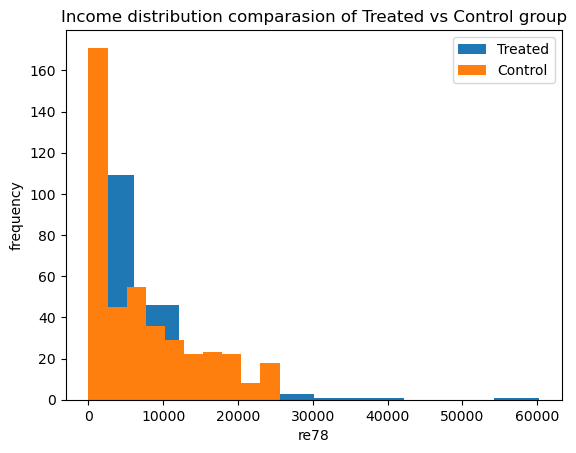

In [55]:
''' your code and explanations ''';
treat = df[(df['treat']==1)]
control = df[(df['treat']==0)]

print('---Treated group---')
print(treat['re78'].describe())
print()
print('---Control group---')
print(control['re78'].describe())

plt.hist(treat['re78'], label='Treated')
plt.hist(control['re78'], label= 'Control')
plt.xlabel('re78')
plt.ylabel('frequency')
plt.title('Income distribution comparasion of Treated vs Control group')
plt.legend()

In [16]:
"""Control group has higher re78, meaning that that the treatment(job training) has negative effect on real earning """

'Control group has higher re78, meaning that that the treatment(job training) has negative effect on real earning '

## 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

In [144]:
"""age, educ,re75 (so get an idea of pre treat for all) are continous -> histogram. 
    black, hispan, white -> bar plot. 
    married and non degree -> its own barplot"""

features = df.drop(columns=['id','treat']).columns
print(features)

Index(['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75',
       're78', 'white'],
      dtype='object')


Index(['age', 'educ', 're75'], dtype='object')


" Control group has higher age, educ and re75. \nThis could impact the finding that control group has re78: \n    - older people usually has higher income\n    - more eductate people gain more\n    - re75 being the income before the tratetment and higher also before '78 means that the base was already different."

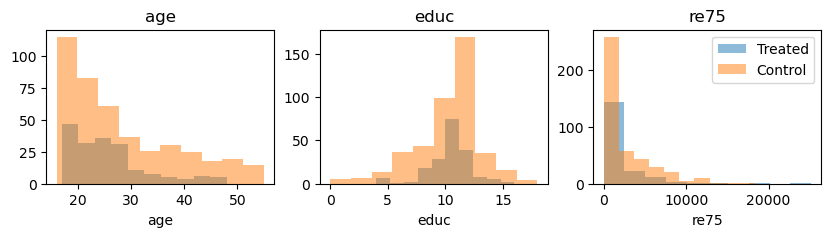

In [157]:
''' your code and explanations ''';
# Continuous
continuous_f = features[features.isin(['age','educ','re75'])]
print(continuous_f)

fig, ax = plt.subplots(1,3,figsize=(10,2))
ax = ax.flatten()

for i,f in enumerate(continuous_f):
    ax[i].hist(treat[f], alpha=0.5, label = 'Treated')
    ax[i].hist(control[f], alpha= 0.5, label = 'Control')
    ax[i].set_title(f)
    ax[i].set_xlabel(f)
plt.legend()

""" Control group has higher age, educ and re75. 
This could impact the finding that control group has re78: 
    - older people usually has higher income
    - more eductate people gain more
    - re75 being the income before the tratetment and higher also before '78 means that the base was already different."""

        Treated  Control
white        18      281
black       156       87
hispan       11       61


C:\Users\seves\AppData\Local\Temp\ipykernel_27124\1538623205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treat['white'] = ((treat['black'] == 0) & (treat['hispan'] == 0)).astype(int)
C:\Users\seves\AppData\Local\Temp\ipykernel_27124\1538623205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['white'] = ((control['black'] == 0) & (control['hispan'] == 0)).astype(int)


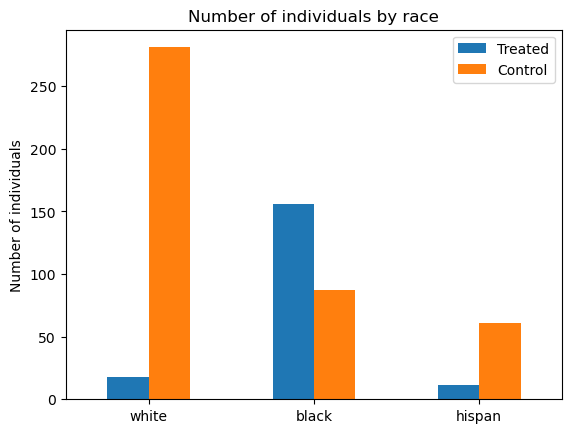

'" For recist reason, white people could gain more and since the control group has the higher number of white people, this could doubt the naive conclusion'

In [158]:
# race
treat['white'] = ((treat['black'] == 0) & (treat['hispan'] == 0)).astype(int)
control['white'] = ((control['black'] == 0) & (control['hispan'] == 0)).astype(int)

race = ['white', 'black', 'hispan']

count_df = pd.DataFrame({'Treated':treat[race].sum(), 'Control': control[race].sum() })
print(count_df)

count_df.plot(kind='bar', rot=0)
plt.ylabel('Number of individuals')
plt.title('Number of individuals by race')
plt.show()

"""" For recist reason, white people could gain more and 
since the control group has the higher number of white people, this could doubt the naive conclusion"""

Treated     35
Control    220
dtype: int64


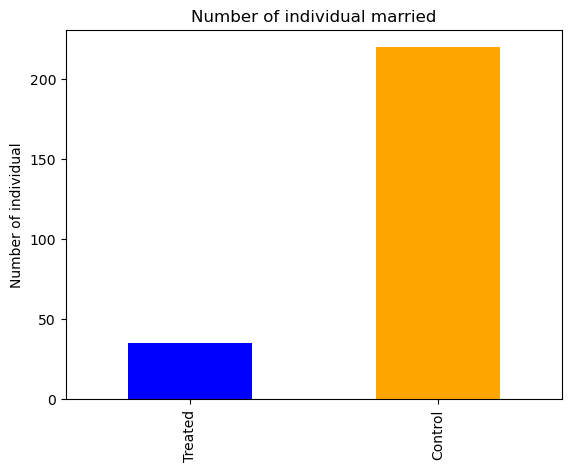

Treated    131
Control    256
dtype: int64


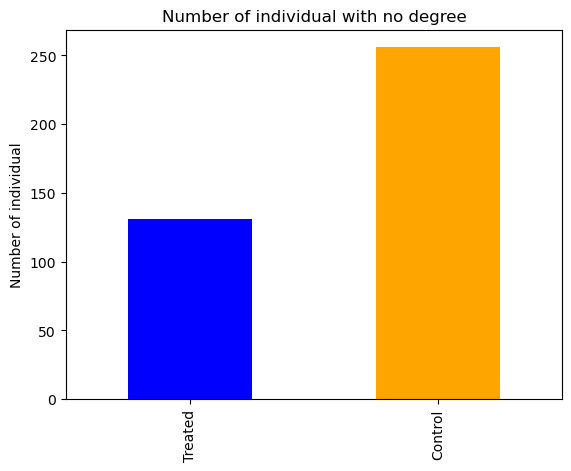

In [129]:
# Married
married_ser = pd.Series({'Treated':treat['married'].sum(), 'Control':control['married'].sum() })
print(married_ser)

married_ser.plot(kind='bar', color= ['blue','orange'])
plt.ylabel('Number of individual')
plt.title('Number of individual married')
plt.show()

# No degree
nodegree_ser = pd.Series({'Treated':treat['nodegree'].sum(), 'Control':control['nodegree'].sum() })
print(nodegree_ser)

nodegree_ser.plot(kind='bar', color= ['blue','orange'])
plt.ylabel('Number of individual')
plt.title('Number of individual with no degree')
plt.show()


## 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `statsmodels` to fit the logistic regression model and apply it to each data point to obtain propensity scores.

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144483/pdf/hmbr46-399.pdf).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144483/pdf/hmbr46-399.pdf).)

In [173]:
''' your code and explanations ''';
import statsmodels.api as sm

lr = sm.Logit(df['treat'],df[features]).fit()
df['propensity score'] = lr.predict()
lr.summary()
df

Optimization terminated successfully.
         Current function value: 0.395074
         Iterations 7


,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,propensity score
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0,0.665675
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0,0.211310
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0,0.785221
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0,0.787978
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0,0.679669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,PSID425,0,18,11,0,0,0,1,0.0,0.0,10150.5000,1,0.136146
610,PSID426,0,24,1,0,1,1,1,0.0,0.0,19464.6100,0,0.053344
611,PSID427,0,21,18,0,0,0,0,0.0,0.0,0.0000,1,0.148294
612,PSID428,0,32,5,1,0,1,1,0.0,0.0,187.6713,0,0.363995


## 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)
a
Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

This is how networkx library can help you do this. Each possible pair of (treated_person, control_person) is characterized by a similarity. This is how we can initialize a graph, and add an edge for one possible pair. We then need to add an edge for each possible pair.
    - G = nx.Graph()
    - G.add_weighted_edges_from([(control_person, treated_person, similarity)])
Optimal matching is then found with:
    - matching = nx.max_weight_matching(G)

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

In [198]:
''' your code and explanations ''';
import networkx as nx
# min sum |prop score_i - prop score_j| of all pairs (treat, control) = max (1-objetive) 
# where 1-obj = similarities

# updating trat and control df
treat = df[(df['treat']==1)]
control = df[(df['treat']==0)]

def similarities(propensity_score1, propensityscore2):
    return 1 - np.abs(propensity_score1-propensityscore2)

G = nx.Graph()
for control_idx, control_row in control.iterrows():
    for treat_idx, treat_row in treat.iterrows():
        sim = similarities(control_row['propensity score'], treat_row['propensity score'])
        G.add_weighted_edges_from([(control_idx,treat_idx,sim)])

matching = nx.max_weight_matching(G)

matched_pairs = [i[0] for i in list(matching)] + [i[1] for i in list(matching)]
df_balanced = df.iloc[matched_pairs]
df_balanced

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white,propensity score
111,NSW112,1,17,9,0,1,0,1,445.1704,74.34345,6210.670,0,0.206038
230,PSID46,0,20,12,1,0,1,0,9555.3440,7055.66100,0.000,0,0.313742
58,NSW59,1,42,14,1,0,1,0,0.0000,0.00000,13167.520,0,0.645765
582,PSID398,0,17,8,1,0,0,1,0.0000,0.00000,4520.366,0,0.652205
373,PSID189,0,26,12,1,0,0,0,0.0000,1448.37100,0.000,0,0.645890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,NSW38,1,23,12,1,0,1,0,0.0000,0.00000,5911.551,0,0.452178
243,PSID59,0,36,12,1,0,1,0,11040.4700,6221.37100,7215.739,0,0.380507
27,NSW28,1,27,10,0,1,0,1,0.0000,0.00000,11142.870,0,0.293503
568,PSID384,0,31,4,0,1,0,1,0.0000,0.00000,1161.493,0,0.119711


Text(0.5, 1.0, 'Income distribution comparison after balancing')

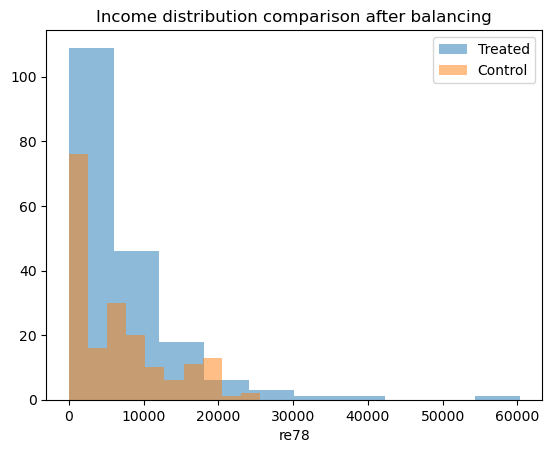

In [208]:
treat_bl = df_balanced[(df_balanced['treat']==1)]
control_bl = df_balanced[(df_balanced['treat']==0)]

plt.hist(treat_bl['re78'], alpha=0.5, label='Treated')
plt.hist(control_bl['re78'],alpha=0.5, label='Control')
plt.legend()
plt.xlabel('re78')
plt.title('Income distribution comparison after balancing')

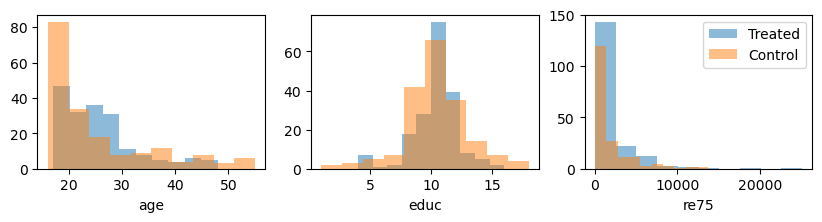

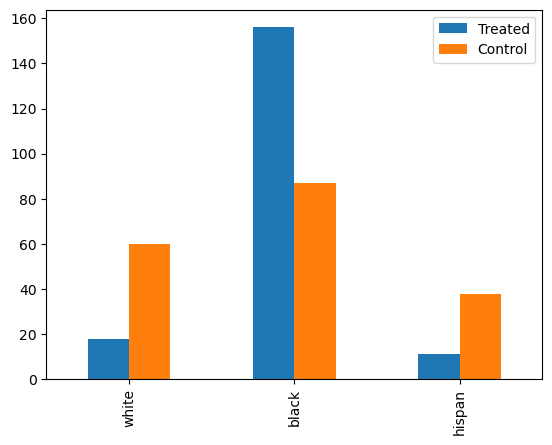

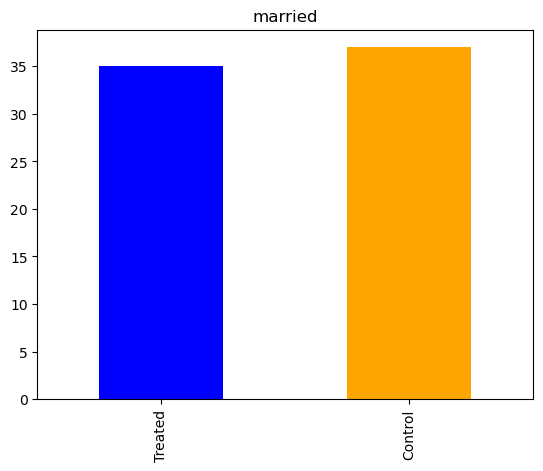

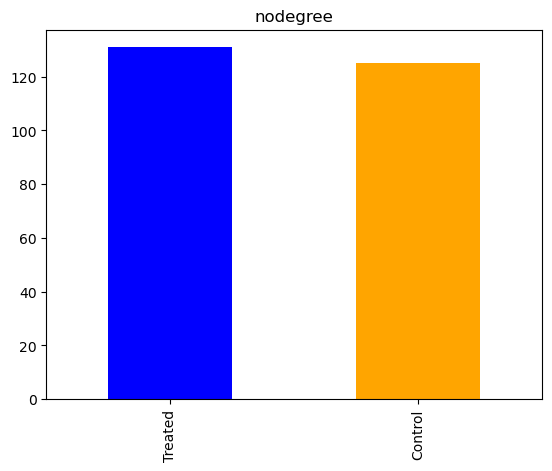

'No balanced. Particularly for race'

In [242]:
fig, ax = plt.subplots(1,3,figsize=(10,2))
for i,f in enumerate(continuous_f):
    ax[i].hist(treat_bl[f],alpha=0.5, label='Treated')
    ax[i].hist(control_bl[f],alpha=0.5, label='Control')
    ax[i].set_xlabel(f)
plt.legend()
plt.show()

race_df_bl = pd.DataFrame({'Treated':treat_bl[race].sum(), 'Control': control_bl[race].sum() })
race_df_bl.plot(kind='bar')
plt.show()

married_ser_bl = pd.Series({'Treated':treat_bl['married'].sum(),'Control':control_bl['married'].sum()})
married_ser_bl.plot(kind='bar', color=['blue','orange'])
plt.title('married')
plt.show()

nodegree_ser_bl = pd.Series({'Treated':treat_bl['nodegree'].sum(),'Control':control_bl['nodegree'].sum()})
nodegree_ser_bl.plot(kind='bar', color=['blue','orange'])
plt.title('nodegree')
plt.show()


"""No balanced. Particularly for race"""

## 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


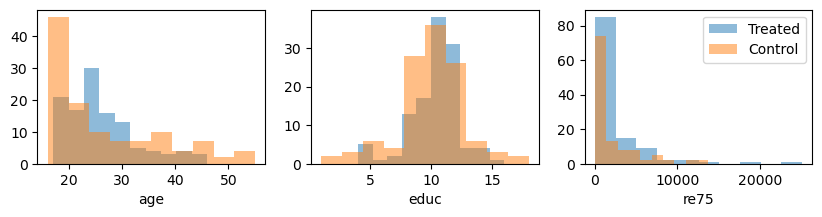

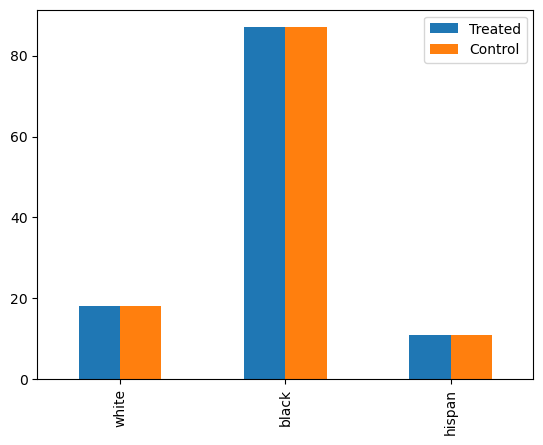

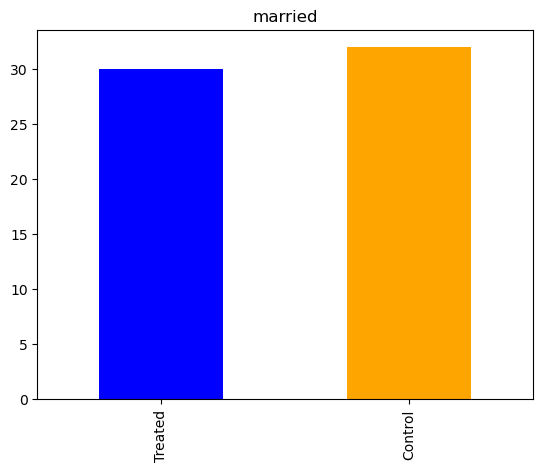

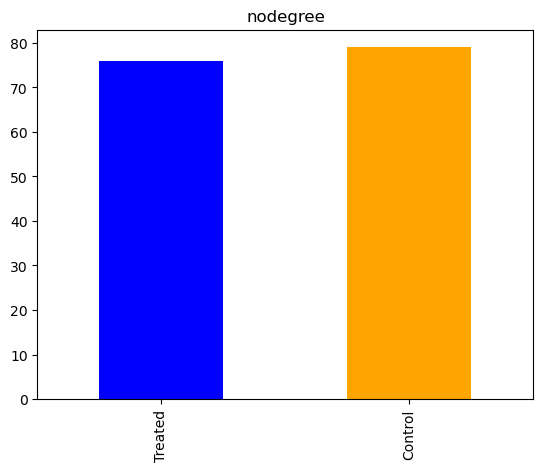

In [253]:
''' your code and explanations ''';

# Race is the feature that is problematic.
G = nx.Graph()
for control_idx, control_row in control.iterrows():
    for treat_idx, treat_row in treat.iterrows():
        if (treat_row['black']==control_row['black']) and (treat_row['hispan']==control_row['hispan']):
            sim = similarities(control_row['propensity score'], treat_row['propensity score'])
            G.add_weighted_edges_from([(control_idx,treat_idx,sim)])

matching2 = nx.max_weight_matching(G)

matched_pairs2 = [i[0] for i in list(matching2)] + [i[1] for i in list(matching2)]
df_balanced2 = df.iloc[matched_pairs2]

treat_bl2 = df_balanced2[(df_balanced2['treat']==1)]
control_bl2 = df_balanced2[(df_balanced2['treat']==0)]

fig, ax = plt.subplots(1,3,figsize=(10,2))
for i,f in enumerate(continuous_f):
    ax[i].hist(treat_bl2[f],alpha=0.5, label='Treated')
    ax[i].hist(control_bl2[f],alpha=0.5, label='Control')
    ax[i].set_xlabel(f)
plt.legend()
plt.show()

race_df_bl2 = pd.DataFrame({'Treated':treat_bl2[race].sum(), 'Control': control_bl2[race].sum() })
race_df_bl2.plot(kind='bar')
plt.show()

married_ser_bl2 = pd.Series({'Treated':treat_bl2['married'].sum(),'Control':control_bl2['married'].sum()})
married_ser_bl2.plot(kind='bar', color=['blue','orange'])
plt.title('married')
plt.show()

nodegree_ser_bl2 = pd.Series({'Treated':treat_bl2['nodegree'].sum(),'Control':control_bl2['nodegree'].sum()})
nodegree_ser_bl2.plot(kind='bar', color=['blue','orange'])
plt.title('nodegree')
plt.show()


## 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?

---Treated---
count      116.000000
mean      5605.734795
std       6266.019894
min          0.000000
25%        492.029875
50%       3956.996000
75%       8499.858000
max      36646.950000
Name: re78, dtype: float64

---Control---
count      116.000000
mean      5869.911930
std       6776.605150
min          0.000000
25%         33.248847
50%       2283.087500
75%       9454.864250
max      25564.670000
Name: re78, dtype: float64


'The control group still has slighlty higher re78 on average. The job train has no effect.'

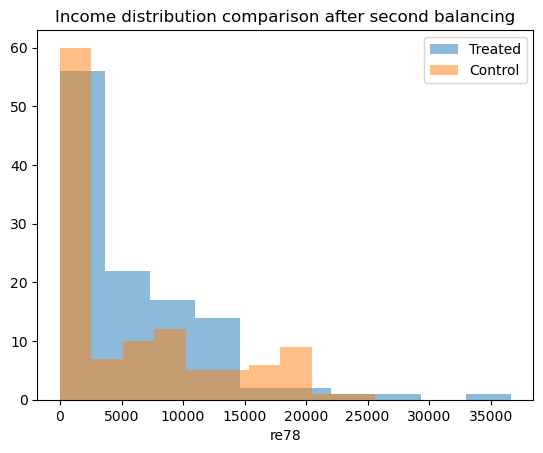

In [254]:
''' your code and explanations ''';

plt.hist(treat_bl2['re78'], alpha=0.5, label='Treated')
plt.hist(control_bl2['re78'],alpha=0.5, label='Control')
plt.legend()
plt.xlabel('re78')
plt.title('Income distribution comparison after second balancing')

print('---Treated---')
print(treat_bl2.re78.describe())
print()
print('---Control---')
print(control_bl2.re78.describe())

"""The control group still has slighlty higher re78 on average. The job train has no effect."""